<a href="https://colab.research.google.com/github/mborkhat/DeepLearningExcercise/blob/master/Assignment_6_(Cifar_100).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import tensorflow as tf
from keras.datasets import cifar100

(X_train,y_train),(X_test,y_test)=cifar100.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Normalize pixel values to be between 0 and 1
X_train,X_test=X_train/255.0,X_test/255.0


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [42]:
from keras.models import Sequential
from keras.layers import Dense


model=tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128,activation='softmax'),
tf.keras.layers.Dense(100)
])

model.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 15, 15, 32)        128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 6, 6, 64)        

In [43]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test))


Epoch 1/30
1563/1563 [==============================] - 7s 4ms/step - loss: 4.4920 - accuracy: 0.0294 - val_loss: 4.4160 - val_accuracy: 0.0374
Epoch 2/30
1563/1563 [==============================] - 7s 4ms/step - loss: 4.3790 - accuracy: 0.0367 - val_loss: 4.3357 - val_accuracy: 0.0395
Epoch 3/30
1563/1563 [==============================] - 7s 4ms/step - loss: 4.3274 - accuracy: 0.0380 - val_loss: 4.3221 - val_accuracy: 0.0378
Epoch 4/30
1563/1563 [==============================] - 7s 4ms/step - loss: 4.2908 - accuracy: 0.0390 - val_loss: 4.2619 - val_accuracy: 0.0436
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 4.2690 - accuracy: 0.0391 - val_loss: 4.3074 - val_accuracy: 0.0395
Epoch 6/30
1563/1563 [==============================] - 7s 4ms/step - loss: 4.2575 - accuracy: 0.0409 - val_loss: 4.2393 - val_accuracy: 0.0434
Epoch 7/30
1563/1563 [==============================] - 7s 4ms/step - loss: 4.2550 - accuracy: 0.0408 - val_loss: 4.2267 - val_accuracy:

313/313 - 1s - loss: 4.2160 - accuracy: 0.0438


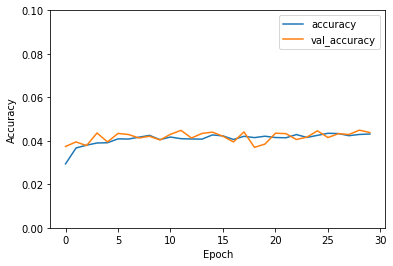

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,0.1])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

In [45]:
score = model.evaluate(X_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 4.2160 - accuracy: 0.0438
Test score: 4.216030120849609
Test accuracy: 0.043800000101327896


MODEL 2

In [54]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


In [55]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               295040    
_________________________________________________________________
dense_21 (Dense)             (None, 10)              

In [56]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, epochs=30)
test_loss = model.evaluate(X_test,y_test)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               295040    
_________________________________________________________________
dense_21 (Dense)             (None, 10)              